Detecting tumors in Brain MRI images

In [1]:
import matplotlib.pyplot as plt
import kaggle
import numpy as np
import cv2 #for computer vision
import os
import PIL #python image library
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
#loading the dataset
dataset_name = "navoneel/brain-mri-images-for-brain-tumor-detection"
data_dir = "./brain_tumor_dataset"
data_set = kaggle.api.dataset_download_files(dataset_name, path=data_dir, unzip=True)

In [3]:
print(os.listdir(data_dir))
#os.listdir will return a list containing the names of all files and folders in the specified directory_path

['brain_tumor_dataset', 'no', 'yes']


In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir 

WindowsPath('brain_tumor_dataset')

In [5]:
data_dir.glob('*/*.jpg')

<generator object Path.glob at 0x000001FF11A34F90>

In [6]:
list(data_dir.glob('*/*.jpg'))
#gives path of all objects of type jpg

[WindowsPath('brain_tumor_dataset/no/10 no.jpg'),
 WindowsPath('brain_tumor_dataset/no/11 no.jpg'),
 WindowsPath('brain_tumor_dataset/no/12 no.jpg'),
 WindowsPath('brain_tumor_dataset/no/13 no.jpg'),
 WindowsPath('brain_tumor_dataset/no/14 no.jpg'),
 WindowsPath('brain_tumor_dataset/no/15 no.jpg'),
 WindowsPath('brain_tumor_dataset/no/17 no.jpg'),
 WindowsPath('brain_tumor_dataset/no/18 no.jpg'),
 WindowsPath('brain_tumor_dataset/no/19 no.jpg'),
 WindowsPath('brain_tumor_dataset/no/20 no.jpg'),
 WindowsPath('brain_tumor_dataset/no/21 no.jpg'),
 WindowsPath('brain_tumor_dataset/no/22 no.jpg'),
 WindowsPath('brain_tumor_dataset/no/23 no.jpg'),
 WindowsPath('brain_tumor_dataset/no/24 no.jpg'),
 WindowsPath('brain_tumor_dataset/no/25 no.jpg'),
 WindowsPath('brain_tumor_dataset/no/26 no.jpg'),
 WindowsPath('brain_tumor_dataset/no/27 no.jpg'),
 WindowsPath('brain_tumor_dataset/no/28 no.jpg'),
 WindowsPath('brain_tumor_dataset/no/29 no.jpg'),
 WindowsPath('brain_tumor_dataset/no/3 no.jpg'),
 

In [7]:
list(data_dir.glob('*/*.jpeg'))
#gives path of all objects of type jpeg

[WindowsPath('brain_tumor_dataset/no/1 no.jpeg'),
 WindowsPath('brain_tumor_dataset/no/2 no.jpeg'),
 WindowsPath('brain_tumor_dataset/no/48 no.jpeg'),
 WindowsPath('brain_tumor_dataset/no/no 5.jpeg'),
 WindowsPath('brain_tumor_dataset/no/no 7.jpeg'),
 WindowsPath('brain_tumor_dataset/no/no 91.jpeg')]

In [8]:
list(data_dir.glob('*/*.png'))
#gives path of all objects of type png

[WindowsPath('brain_tumor_dataset/no/no 9.png'),
 WindowsPath('brain_tumor_dataset/yes/Y92.png')]

In [9]:
#creating a list of paths containing images with tumour
yes = list(data_dir.glob('yes/*'))
#creating a list of paths containing images without tumour
no =  list(data_dir.glob('no/*'))

In [10]:
len(yes), len(no)

(155, 99)

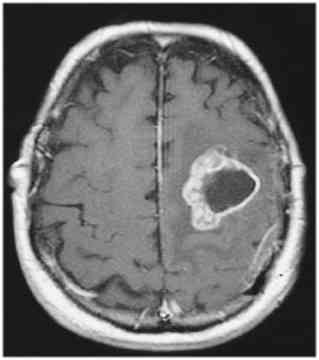

In [11]:
#displaying one image of yes folder
PIL.Image.open(str(yes[1]))

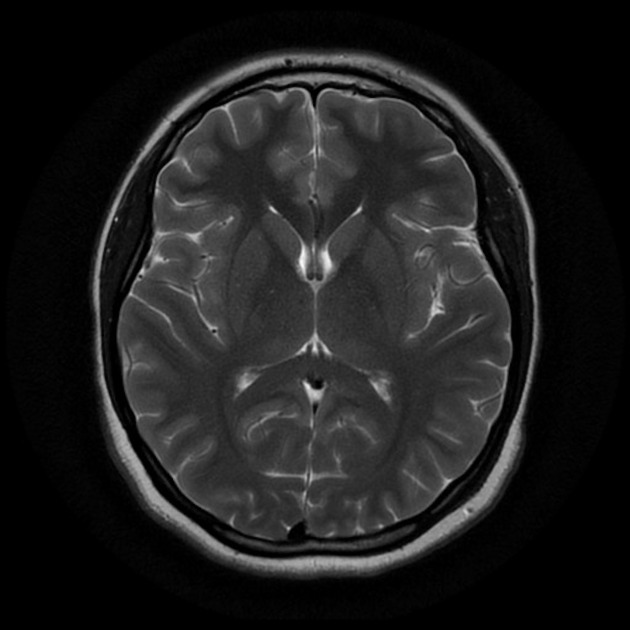

In [12]:
#displaying one image of no folder
PIL.Image.open(str(no[1]))

In [13]:
#creating a dictionary with images from 'yes' and 'no' folder
mri_images_dict = {
    'yes': list(data_dir.glob('yes/*')),
    'no': list(data_dir.glob('no/*')),
}

In [14]:
#creating a dictionary to map yes to 1 and no to 0
mri_labels_dict = {
    'yes': 1,
    'no': 0,
}

In [15]:
str(mri_images_dict['yes'][0])
#it return the file path of the image as string

'brain_tumor_dataset\\yes\\Y1.jpg'

In [16]:
img = cv2.imread(str(mri_images_dict['yes'][0]))
print(img) #imread returns the image as a numpy array
print("Shape: ", img.shape)

[[[3 3 3]
  [3 3 3]
  [3 3 3]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[3 3 3]
  [3 3 3]
  [3 3 3]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[3 3 3]
  [3 3 3]
  [3 3 3]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 ...

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [3 3 3]
  [3 3 3]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [1 1 1]
  [1 1 1]
  [2 2 2]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [1 1 1]
  [1 1 1]
  [2 2 2]]]
Shape:  (218, 180, 3)


In [17]:
cv2.resize(img, (240,240)).shape

(240, 240, 3)

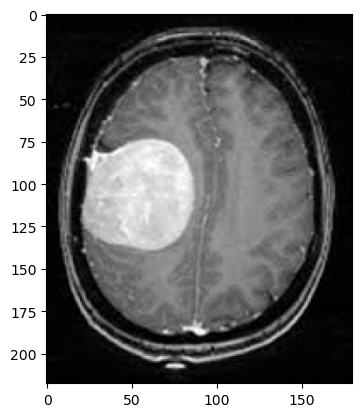

In [18]:
plt.imshow(img)

In [19]:
X, y = [], []

for img_name, images in mri_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        if img is not None and not img.size == 0:
            resized_img = cv2.resize(img, (240, 240))
            X.append(resized_img)
            y.append(mri_labels_dict[img_name])

In [20]:
len(X), len(y)

(253, 253)

In [21]:
#converting list into numpy array
X = np.array(X)
y = np.array(y)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [23]:
len(X_train), len(X_test)

(202, 51)

#Normalize the pixels using ImageDataGenerator

In [24]:
from keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator with rescaling (to normalize the pixels)
datagen = ImageDataGenerator(rescale=1./255.)
 
train_iterator = datagen.flow(X_train, y_train, batch_size=1)
test_iterator = datagen.flow(X_test, y_test, batch_size=1)


In [25]:
model = Sequential([
    #first convolution and MaxPooling layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    #second convolution and MaxPooling layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    #third convolution and MaxPooling layer
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    #coverting the 2D array into 1D array
  layers.Flatten(),
    #dense layer
  layers.Dense(80, activation='relu'),
    #output layer
  layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
              
model.fit(train_iterator, epochs=10)    

Epoch 1/10
202/202 [==============================] - 6s 27ms/step - loss: 0.7081 - accuracy: 0.6980
Epoch 2/10
202/202 [==============================] - 5s 25ms/step - loss: 0.5584 - accuracy: 0.7822
Epoch 3/10
202/202 [==============================] - 5s 25ms/step - loss: 0.5370 - accuracy: 0.8168
Epoch 4/10
202/202 [==============================] - 5s 25ms/step - loss: 0.3322 - accuracy: 0.8812
Epoch 5/10
202/202 [==============================] - 5s 24ms/step - loss: 0.1728 - accuracy: 0.9356
Epoch 6/10
202/202 [==============================] - 5s 25ms/step - loss: 0.0664 - accuracy: 0.9752
Epoch 7/10
202/202 [==============================] - 5s 24ms/step - loss: 0.0258 - accuracy: 0.9950
Epoch 8/10
202/202 [==============================] - 5s 24ms/step - loss: 0.1218 - accuracy: 0.9505
Epoch 9/10
202/202 [==============================] - 5s 24ms/step - loss: 0.0403 - accuracy: 0.9851
Epoch 10/10
202/202 [==============================] - 5s 23ms/step - loss: 0.0084 - accura

In [26]:
model.evaluate(test_iterator)

51/51 [==============================] - 1s 8ms/step - loss: 0.7991 - accuracy: 0.8824


[0.7991433143615723, 0.8823529481887817]

In [27]:
#while training the accuracy was 98%, for test set the accuracy dropped to 65%. So overfitting occurs
y_pred = model.predict(X_test)
y_pred[:5]

2/2 [==============================] - 0s 67ms/step


array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [28]:
score = tf.nn.softmax(y_pred[0]) #to convert predictions in the range of 0 to 1
score 

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.7310586 , 0.26894143], dtype=float32)>

In [29]:
 np.argmax(score)

0

In [30]:
y_test[0]

0

In [31]:
#so it predicted first test image correctly

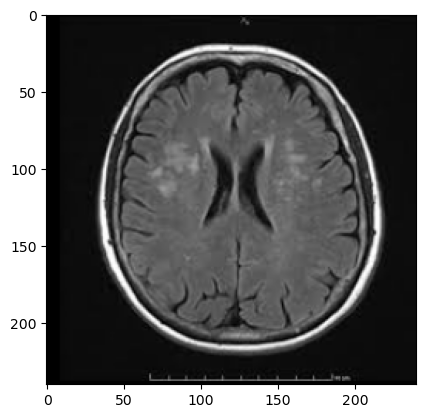

In [32]:
plt.imshow(X_test[0]) #this image is predicted correctly

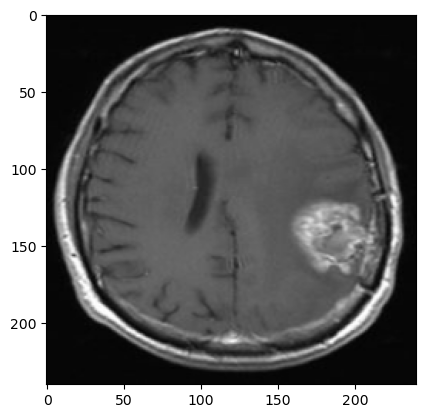

In [33]:
plt.imshow(X_test[1]) #this image is also predicte correctly

In [34]:
y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred_classes[:5]

[0, 1, 1, 1, 0]

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
print("Classification report: \n", classification_report(y_test, y_pred_classes))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        20
           1       0.84      1.00      0.91        31

    accuracy                           0.88        51
   macro avg       0.92      0.85      0.87        51
weighted avg       0.90      0.88      0.88        51



In [36]:
# Create an instance of ImageDataGenerator with data augmentation
datagen1 = ImageDataGenerator(rescale=1./255., 
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.3,
                             )

train_iterator = datagen1.flow(X_train, y_train, batch_size=1)
#using datagen(only rescaling) for test images

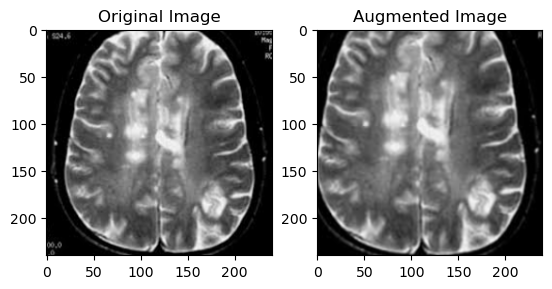

In [37]:
img = X_train[0]
img = np.expand_dims(img, axis=0)

# Generate augmented images using the flow method
augmented_images = datagen1.flow(img, batch_size=1)

# Retrieve the augmented image from the generator
augmented_image = augmented_images.next()[0]

# Display the original and augmented images side by side
plt.subplot(1, 2, 1)
plt.imshow(img[0])
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(augmented_image)
plt.title('Augmented Image')

plt.show()

In [44]:
model1 = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(48, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(80, activation='relu'),
  layers.Dense(2, activation='sigmoid')
])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
# Number of epochs with no improvement after which training will be stopped. Defaults to 0.

model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'],)
              
model1.fit(train_iterator, callbacks=[callback], epochs=20)  

Epoch 1/20
202/202 [==============================] - 7s 30ms/step - loss: 0.6803 - accuracy: 0.6139
Epoch 2/20
202/202 [==============================] - 6s 32ms/step - loss: 0.6828 - accuracy: 0.6188
Epoch 3/20
202/202 [==============================] - 6s 30ms/step - loss: 0.6463 - accuracy: 0.6139
Epoch 4/20
202/202 [==============================] - 6s 30ms/step - loss: 0.7120 - accuracy: 0.6040
Epoch 5/20
202/202 [==============================] - 6s 30ms/step - loss: 0.6791 - accuracy: 0.6188


In [45]:
model1.evaluate(test_iterator)

51/51 [==============================] - 0s 5ms/step - loss: 0.5883 - accuracy: 0.6078


[0.5882644653320312, 0.6078431606292725]

In [46]:
y_pred = model1.predict(X_test)
y_pred[:5]

2/2 [==============================] - 0s 44ms/step


array([[9.8502910e-01, 1.0000000e+00],
       [1.0000000e+00, 1.0000000e+00],
       [1.4371218e-04, 9.9999940e-01],
       [1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.0000000e+00]], dtype=float32)

In [47]:
y_pred_classes = [np.argmax(element) for element in y_pred]

In [48]:
print("Classification report with augmentation and early stopping: \n", classification_report(y_test, y_pred_classes))

Classification report with augmentation and early stopping: 
               precision    recall  f1-score   support

           0       0.19      0.30      0.23        20
           1       0.26      0.16      0.20        31

    accuracy                           0.22        51
   macro avg       0.23      0.23      0.22        51
weighted avg       0.23      0.22      0.21        51



From the above analysis, it is seen that the model with data augmentation, drop out and early stopping predicts 
1. images with no tumor with 100% precision
2. images with tumor with only 63% precision
3. accuracy dropped to 65%. So this isn't a good model for detecting tumors.

It is seen that the model without data augmentation, drop out and early stopping performs well 
1. with 80% accuracy
2. 92% precision in predicting images with tumor
3. for images without tumor tumor the precision dropped to 69% 

Conclusion: The first model is the preferred one for the given image dataset